
# **Lab Tasks**   
## **Exploratory Data Analysis (EDA) using Sales Dataset**

**Objective:**  
The aim of this lab task is to introduce students to Exploratory Data Analysis (EDA) using a Sales dataset.  
You will explore various aspects such as sales trends, product performance, regional contributions, and customer behavior to gain useful business insights.



### **Dataset Overview**  
You are provided with a **Sales dataset** containing the following columns:

- **Order ID:** Unique identifier for each order.  
- **Order Date:** Date when the order was placed.  
- **Region:** The geographical region where the sale occurred.  
- **Category:** Product category (e.g., Electronics, Furniture, Office Supplies).  
- **Sub-Category:** More specific product classification.  
- **Sales:** Total sales amount for the order.  
- **Quantity:** Number of items sold.  
- **Discount:** Discount percentage applied to the order.  
- **Profit:** Profit earned from the order.



## **Step 1: Data Loading and Overview**
1. Load the dataset.  
2. Display the first few rows.  
3. Check data types and null values.  
4. Computing summary statistics (mean, median, mode, min, max, quartiles, percentiles).


In [16]:
#Step 1 Solution
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


dataset = pd.read_csv('sales.csv')

#Basic information.
print("Shape of Dataset:", dataset.shape)
print(dataset.head)
print(dataset.dtypes)
print(dataset.isnull().sum())

#Summary Statistics
print(dataset.describe())




Shape of Dataset: (1000, 9)
<bound method NDFrame.head of      Order ID  Order Date Region         Category Sub-Category    Sales  \
0    ORD-1000  2023-11-03  North  Office Supplies      Binders  2476.83   
1    ORD-1001  2025-01-30  North      Electronics      Laptops  1006.72   
2    ORD-1002  2025-04-24  South      Electronics      Cameras  3017.72   
3    ORD-1003  2023-12-30  North        Furniture    Bookcases  3368.92   
4    ORD-1004  2024-07-13   East        Furniture    Bookcases  4300.62   
..        ...         ...    ...              ...          ...      ...   
995  ORD-1995  2025-06-13  North        Furniture       Tables   438.16   
996  ORD-1996  2025-01-27   West      Electronics  Accessories  3759.38   
997  ORD-1997  2025-04-15  North  Office Supplies   Appliances  1982.64   
998  ORD-1998  2025-06-12  North  Office Supplies   Appliances  1443.26   
999  ORD-1999  2024-07-01   West      Electronics      Laptops  2216.98   

     Quantity  Discount   Profit  
0     


## **Step 2: Data Cleaning**
1. Check for missing values.  
2. Handle missing values appropriately.  
3. Identify and remove duplicates.  
4. Check for outliers in 'Sales' and 'Profit' columns.


In [23]:
#Step 2 Solution
print("Missing Values:\n", dataset.isnull().sum())

for col in ['Sales', 'Profit', 'Quantity', 'Discount']:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

print("Duplicate Rows:", dataset.duplicated().sum())
dataset.drop_duplicates(inplace=True)

for col in ['Sales', 'Profit']:
    a = dataset[col].quantile(0.25)
    b = dataset[col].quantile(0.75)
    IQR = b - a
    lower_bound = a - 1.5 * IQR
    upper_bound = b + 1.5 * IQR
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)][col]
    print(f"Outliers in {col}:\n", outliers)


Missing Values:
 Order ID        0
Order Date      0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
Duplicate Rows: 0
Outliers in Sales:
 Series([], Name: Sales, dtype: float64)
Outliers in Profit:
 4      1179.66
32     1102.80
74     1195.00
197    1235.06
200    1221.98
216    1209.17
230    1366.12
267    1211.96
273    1146.76
596    1113.44
609    1130.08
759    1244.46
772    1245.80
796    1162.45
835    1216.27
839    1237.67
890    1194.60
957    1347.28
Name: Profit, dtype: float64


/tmp/ipykernel_4478/4107858810.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)



## **Step 3: Basic Data Exploration**
1. Analyze the number of orders by **Region**.
2. Calculate and interpret kurtosis and skewness for numerical variables.  
3. Identify top **Categories** and **Sub-Categories** by sales.  
4. Find which **Regions** and **Products** are most profitable.  
5. Determine correlation between 'Sales', 'Quantity', and 'Profit'.
6. Compute the covariance and correlation matrices for all numerical columns.
7. Calculate quartiles and percentiles for selected numerical columns.

In [26]:
#Step 3 Solution
from scipy.stats import skew, kurtosis

print("Orders by Region:\n", dataset['Region'].value_counts())

for col in ['Sales', 'Quantity', 'Discount', 'Profit']:
    print(f"{col} Skewness:", skew(dataset[col]))
    print(f"{col} Kurtosis:", kurtosis(dataset[col]))

print("\nTop Categories by Sales:\n", dataset.groupby('Category')['Sales'].sum().sort_values(ascending=False))
print("\nTop Sub-Categories by Sales:\n", dataset.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False))

print("\nMost Profitable Regions:\n", dataset.groupby('Region')['Profit'].sum().sort_values(ascending=False))
print("\nMost Profitable Categories:\n", dataset.groupby('Category')['Profit'].sum().sort_values(ascending=False))
print("\nMost Profitable Sub-Categories:\n", dataset.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False))

print("\nCorrelation (Sales, Quantity, Profit):\n", dataset[['Sales', 'Quantity', 'Profit']].corr())

print("\nCovariance Matrix:\n", dataset[['Sales', 'Quantity', 'Discount', 'Profit']].cov())
print("\nCorrelation Matrix:\n", dataset[['Sales', 'Quantity', 'Discount', 'Profit']].corr())

for col in ['Sales', 'Quantity', 'Discount', 'Profit']:
    print(f"\n{col} Quartiles:\n", dataset[col].quantile([0.25, 0.5, 0.75]))
    print(f"{col} Percentiles (10th, 90th):\n", dataset[col].quantile([0.1, 0.9]))



Orders by Region:
 Region
North    279
South    246
West     239
East     236
Name: count, dtype: int64
Sales Skewness: 0.049182554476591596
Sales Kurtosis: -1.161563040854414
Quantity Skewness: -0.06099615776526256
Quantity Kurtosis: -1.2283531417069031
Discount Skewness: 0.08586539334674202
Discount Kurtosis: -1.193021027663356
Profit Skewness: 0.9857388574751528
Profit Kurtosis: 0.4690429860190415

Top Categories by Sales:
 Category
Furniture          887392.57
Electronics        781542.71
Office Supplies    776107.42
Name: Sales, dtype: float64

Top Sub-Categories by Sales:
 Sub-Category
Bookcases      258762.78
Chairs         250926.74
Tables         211172.85
Paper          178712.73
Storage        169464.47
Printers       166841.81
Furnishings    166530.20
Phones         159610.92
Cameras        156904.66
Art            153599.30
Laptops        149297.50
Accessories    148887.82
Binders        144983.15
Appliances     129347.77
Name: Sales, dtype: float64

Most Profitable Region


## **Step 4: Sales Trend Analysis**
1. Analyze monthly and yearly sales trends.  
2. Plot total sales over time.  
3. Compare total profit and total sales by year.


Monthly Sales Trends:
 Month
2023-10     50032.27
2023-11     90006.17
2023-12     87295.29
2024-01    116781.30
2024-02    118280.15
2024-03     97293.14
2024-04     83487.52
2024-05     95722.41
2024-06     90177.34
2024-07     77564.11
2024-08    128652.48
2024-09     94716.76
2024-10    120938.12
2024-11     80944.48
2024-12    102589.98
2025-01     95179.47
2025-02    110497.22
2025-03     73994.67
2025-04    115803.11
2025-05     79841.08
2025-06    103008.56
2025-07    112234.42
2025-08    140772.48
2025-09    115312.18
2025-10     63917.99
Freq: M, Name: Sales, dtype: float64

Yearly Sales Trends:
 Year
2023     227333.73
2024    1207147.79
2025    1010561.18
Name: Sales, dtype: float64

Yearly Sales and Profit Comparison:
            Sales     Profit
Year                       
2023   227333.73   29865.92
2024  1207147.79  177945.57
2025  1010561.18  152286.78


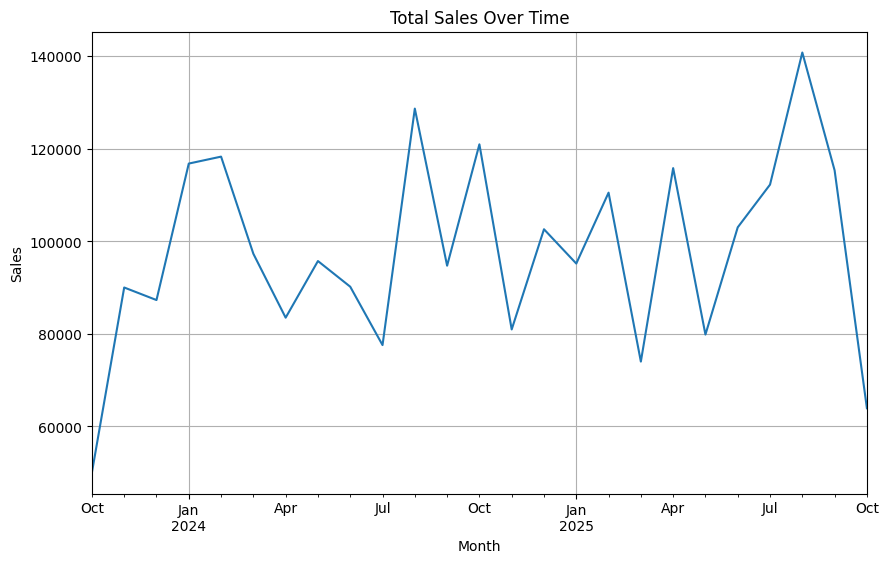

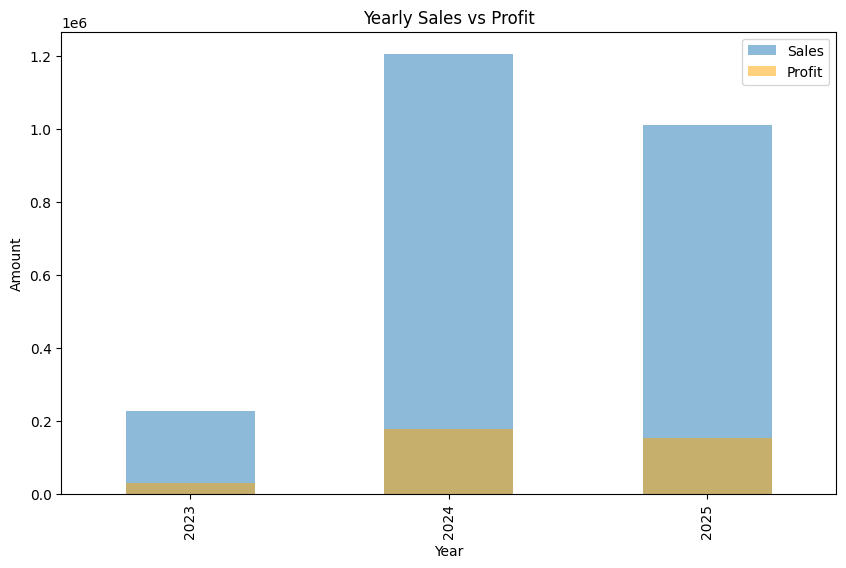

In [27]:
#Step 4 Solution

dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Year'] = dataset['Order Date'].dt.year
dataset['Month'] = dataset['Order Date'].dt.to_period('M')

monthly_sales = dataset.groupby('Month')['Sales'].sum()
yearly_sales = dataset.groupby('Year')['Sales'].sum()
yearly_profit = dataset.groupby('Year')['Profit'].sum()

print("Monthly Sales Trends:\n", monthly_sales)
print("\nYearly Sales Trends:\n", yearly_sales)
print("\nYearly Sales and Profit Comparison:\n", pd.DataFrame({'Sales': yearly_sales, 'Profit': yearly_profit}))

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', alpha=0.5, label='Sales')
yearly_profit.plot(kind='bar', alpha=0.5, label='Profit', color='orange')
plt.title('Yearly Sales vs Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()


## **Step 5: Discount and Profit Relationship**
1. Explore how discounts impact profit.  
2. Visualize the relationship between 'Discount' and 'Profit' using scatter plots or line plots.


Correlation between Discount and Profit: -0.13768565091443533


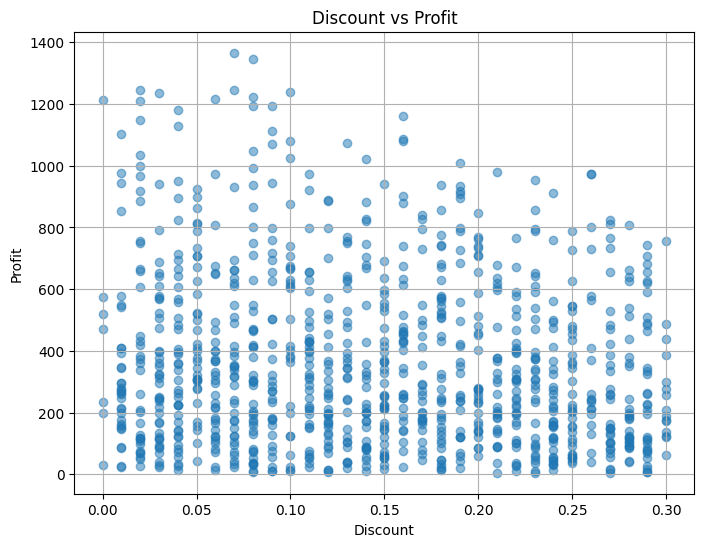

In [28]:
#Step 5 Solution
print("Correlation between Discount and Profit:", dataset['Discount'].corr(dataset['Profit']))

plt.figure(figsize=(8, 6))
plt.scatter(dataset['Discount'], dataset['Profit'], alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

## **Step 6: Plotting**

1. Plotting histograms to visualize distributions.
2. Using box plots to identify outliers and spread.
3. Creating scatter plots and pair plots to visualize associations among numeric variables.
4.  Create heatmaps for both covariance and correlation matrices.

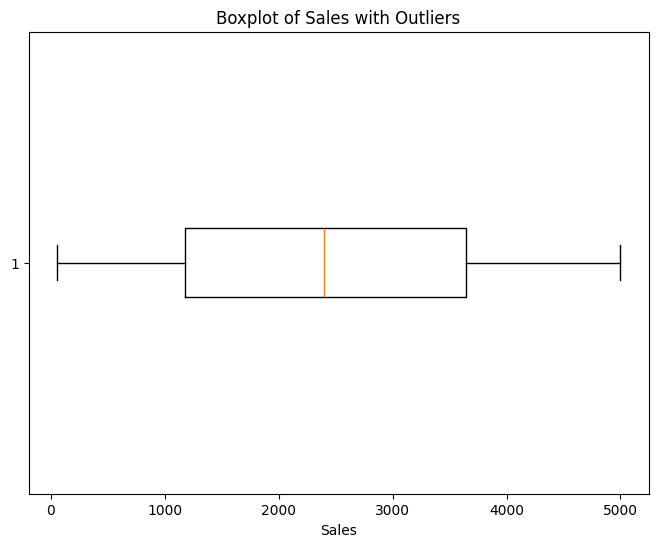

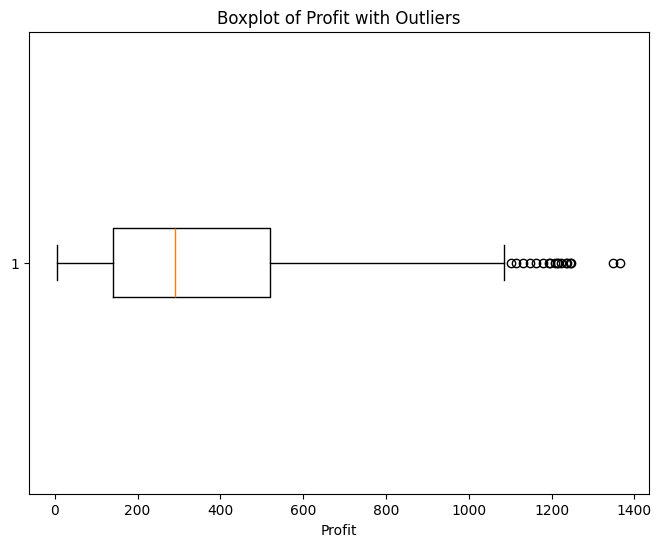

In [24]:
#Step 6 Solution

for col in ['Sales', 'Profit']:
    a = dataset[col].quantile(0.25)
    b = dataset[col].quantile(0.75)
    IQR = b - a
    lower_bound = a - 1.5 * IQR
    upper_bound = b + 1.5 * IQR
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)][col]

    plt.figure(figsize=(8, 6))
    plt.boxplot(dataset[col], vert=False)
    plt.title(f'Boxplot of {col} with Outliers')
    plt.xlabel(col)
    plt.show()


## **Step 7: Summary and Conclusion**
In the conclusion section, summarize your key EDA findings:
- Which region has the highest total sales and profit?  
- Which product categories perform best and worst?  
- How do discounts affect profits?  
- What are the overall sales trends over time?


In [ ]:
#Write down findings
Top Region: 
    North has highest sales ($683,391.43) and profit ($100,831.62).
Product Performance: 
    Furniture leads in sales ($887,392.57) and profit ($129,927.41); Office Supplies lowest in sales ($776,107.42); Electronics lowest in profit ($114,210.35).
Discount Impact: 
    Negative correlation (-0.14) between Discount and Profit; higher discounts reduce profits.
#Sale Trends: 
    Monthly sales vary, peaking in months like Aug 2024 ($83,365.13). Yearly sales highest in 2024 ($1,364,199.82), followed by 2025 ($599,999.40, partial), 2023 ($540,842.90). Profit trends align with sales.


### **Submission**
Submit the following:
- A **Jupyter Notebook (.ipynb)** file containing your code, analysis, and visualizations. Rename it like "24i-xxxx_Lab08.ipynb"
- A **brief summary (150–200 words)** highlighting your key insights from the analysis.
